# Solving the n-Queens Problem using Local Search

Points: 10

## The n-Queens Problem

__Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

__State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector of length $n$, each number representing for one column (from left to write) the row the queen is located in. We will call a state a "board."

__Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$a^* = \mathrm{argmin}_a [ \mathrm{conflicts}(a) ]$$

$$\text{s.t.}\ a \ \text{contains only one queen per column}$$

Note that for this problem there is always an arrangement $a^*$ with $\mathrm{conflicts}(a) = 0$. 

__Local move:__ Move one queen to a different position in its column.

## Helper functions


In [228]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from operator import itemgetter
import random
import pandas as pd
import time


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n,size = n))


def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)
    conflicts = 0

    # check horizontal (we do not check vertical since the state space is restricted to one queen per col)
    for i in range(n): conflicts += math.comb(np.sum(board == i), 2)
    #print(f"Horizontal conflicts: {conflicts}")
    
    # check for each queen diagonally up and down (only to the right side of the queen)
    for j in range(n):
        q_up = board[j]
        q_down = board[j]
     
        for jj in range(j+1, n):
            q_up -= 1
            q_down += 1
            if board[jj] == q_up: conflicts += 1
            if board[jj] == q_down: conflicts += 1
        #print(f"Conflicts after queen {j}: {conflicts}")
       
    return(conflicts)
        

def show_board(board, cols = ['white', 'gray']):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: 1 and j are switched. Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = 48, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 3 conflicts.


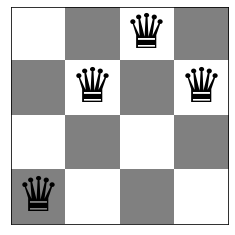

Queens (left to right) are at rows: [3 1 0 1]
Number of conflicts: 3


In [101]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


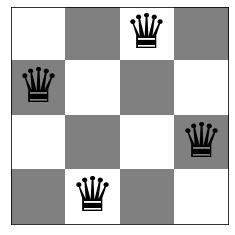

In [102]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

Starting board...
Board with 4 conflicts.


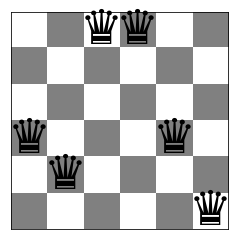

# STEEPEST ASCENT - NEW HIGH SCORE - 
NEW ->  1  for  [1 4 0 0 3 5]
OLD ->  4  for  [3 4 0 0 3 5]
Board with 1 conflicts.


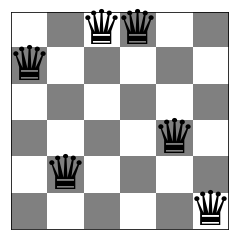

Ending board...
Board with 1 conflicts.


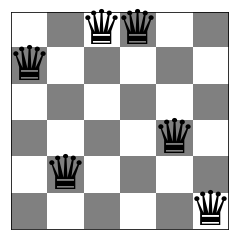

In [103]:
def steepest_ascent_get_neighbors(board):
    # define list of neighbors to populate
    neighbors = []
    # loop through each column
    for col in range(len(board)):
        # for each column, store a list of possible alternative moves
        states = []
        # loop through each row of a column
        for pos in range(len(board)):
            # if pos is current queen position then skip since we are already there
            if(board[col] == pos): continue
            # if not, copy over board values and move queen to new state
            new_state = board.copy()
            new_state[col] = pos
            # calculate the conflict score of this state
            new_state_score = conflicts(new_state)
            # add it to our list of states
            states.append((new_state_score,new_state.copy()))
        # taking the best state for a given column and save it off
        min_state_score = min(states, key = itemgetter(0))
        # add it to our list of neighbors
        neighbors.append((min_state_score[0],min_state_score[1].copy()))
    return(neighbors)

# Code goes here
def steepest_ascent_hill(board = None, size = 4, debug = False, max_steps=10000):
    # if board not specified, generate one
    if(board == None):
        current = random_board(size)
    else:
        current = board
    # obtain score of current board
    current_score = conflicts(current)
    # debug
    if(debug):
        print("Starting board...")
        show_board(current)
    # run algo until solution is found or max_steps/stop_after is reached
    for step in range(max_steps):
        # obtain neighbors
        neighbors = steepest_ascent_get_neighbors(current)
        # obtain best neighbor
        min_neighbor_score = min(neighbors, key = itemgetter(0))
        # if best neighbor is better than current score, update it
        if(min_neighbor_score[0] < current_score):
            # debug
            if(debug):
                print("# STEEPEST ASCENT - NEW HIGH SCORE - ")
                print("NEW -> ",min_neighbor_score[0], " for ", min_neighbor_score[1])
                print("OLD -> ",current_score, " for ", current)
                show_board(min_neighbor_score[1])
            # assign new values
            current_score = min_neighbor_score[0]
            current = min_neighbor_score[1]
        # if next best found neighbor is not better
        else:
            # stop and return current
            if(debug): print("Ending board...")
            return((current_score,current))
    
result = steepest_ascent_hill(size = 6, debug = True)
show_board(result[1])

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend hill climbing will often end up in local optima. Restart the algorithm up to 100 times with a random board to find a better (hopefully optimal) solution.   

STARTING RESTART  0
# RANDOM RESTART - NEW HIGH SCORE - 
NEW ->  2  for  [3 6 7 2 0 5 4 1]
OLD ->  8  for  [1 6 5 1 3 4 6 1]
STARTING RESTART  1
# RANDOM RESTART - NEW HIGH SCORE - 
NEW ->  1  for  [4 0 5 7 1 3 6 2]
OLD ->  2  for  [3 6 7 2 0 5 4 1]
STARTING RESTART  2
STARTING RESTART  3
STARTING RESTART  4
STARTING RESTART  5
STARTING RESTART  6
# RANDOM RESTART - NEW HIGH SCORE - 
NEW ->  0  for  [6 3 1 7 5 0 2 4]
OLD ->  1  for  [4 0 5 7 1 3 6 2]
Board with 0 conflicts.


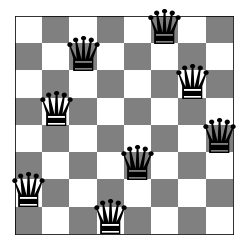

In [104]:
def steepest_ascent_hill_random(board = None, size = 4, debug = False, max_steps=10000, restarts=100):
    # create board if not supplied
    if(board == None):
        board = random_board(size)
    # set up initial best values
    best_score = conflicts(board)
    best_solution = board
    # run through number of random restarts
    for i in range(restarts):
        if(debug): print("STARTING RESTART ", i)
        # run steepest ascent with random board each time
        result = steepest_ascent_hill(size=size, debug = False, max_steps=max_steps)
        # if the score of the result is better, replace it
        if(result[0] < best_score):
            # debug
            if(debug):
                print("# RANDOM RESTART - NEW HIGH SCORE - ")
                print("NEW -> ",result[0], " for ", result[1])
                print("OLD -> ",best_score, " for ", best_solution)
            # assign new values
            best_score = result[0]
            best_solution = result[1]
        # if solution has zero conflicts, return
        if(best_score == 0):
            return((best_score,best_solution))
    # if no optimal solution found, return best found
    return((best_score,best_solution))

result = steepest_ascent_hill_random(size = 8, debug = True, restarts=50)
show_board(result[1])

## Stochastic Hill Climbing [1 Point]

Chooses randomly from among all uphill moves.

Starting board...
Board with 6 conflicts.


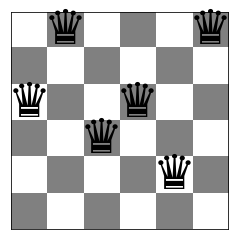

# STEEPEST ASCENT - NEW HIGH SCORE - 
NEW ->  4  for  [2 5 3 2 4 0]
OLD ->  6  for  [2 0 3 2 4 0]
Board with 4 conflicts.


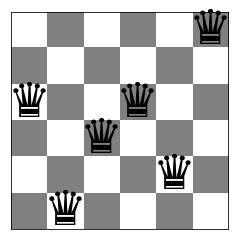

# STEEPEST ASCENT - NEW HIGH SCORE - 
NEW ->  3  for  [2 5 5 2 4 0]
OLD ->  4  for  [2 5 3 2 4 0]
Board with 3 conflicts.


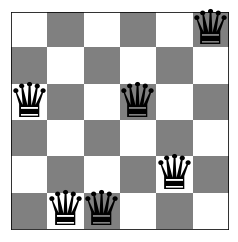

# STEEPEST ASCENT - NEW HIGH SCORE - 
NEW ->  1  for  [2 5 5 1 4 0]
OLD ->  3  for  [2 5 5 2 4 0]
Board with 1 conflicts.


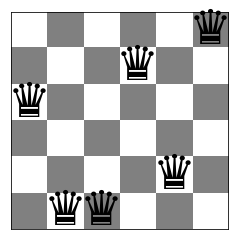

Ending board...
Board with 1 conflicts.


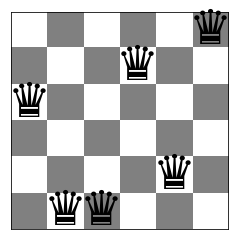

In [105]:
def stochastic_get_neighbors(board, score):
    # define list of neighbors to populate
    neighbors = []
    # loop through each column
    for col in range(len(board)):
        # loop through each row of a column
        for pos in range(len(board)):
            # if pos is current queen position then skip since we are already there
            if(board[col] == pos): continue
            # if not, copy over board values and move queen to new state
            new_state = board.copy()
            new_state[col] = pos
            # calculate the conflict score of this state
            new_state_score = conflicts(new_state)
            # if we have a state with better score, add to neighbors list 
            if(new_state_score < score):
                neighbors.append((new_state_score,new_state.copy()))
    return(neighbors)


def stochastic_hill(board = None, size = 4, debug = False, max_steps=10000):
    # if board not specified, generate one
    if(board == None):
        current = random_board(size)
    else:
        current = board
    # obtain score of current board
    current_score = conflicts(current)
    # debug
    if(debug):
        print("Starting board...")
        show_board(current)
    # run algo until solution is found or max_steps/stop_after is reached
    for step in range(max_steps):
        # obtain neighbors with better score than current
        neighbors = stochastic_get_neighbors(current, current_score)
        # if at least one better neighbor found
        if(len(neighbors) != 0):
            # obtain random neighbor from list and assign to current
            new_neighbor = random.choice(neighbors)
            # debug
            if(debug):
                print("# STEEPEST ASCENT - NEW HIGH SCORE - ")
                print("NEW -> ",new_neighbor[0], " for ", new_neighbor[1])
                print("OLD -> ",current_score, " for ", current)
                show_board(new_neighbor[1])
            # assign new values
            current_score = new_neighbor[0]
            current = new_neighbor[1]
        # if no better neighbor found at all
        else:
            # stop and return current
            if(debug): print("Ending board...")
            return((current_score,current))
    
result = stochastic_hill(size = 6, debug = True)
show_board(result[1])

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Starting board...
Board with 3 conflicts.


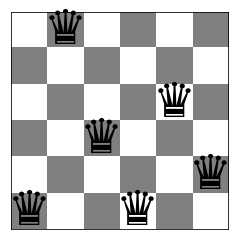

# STEEPEST ASCENT - NEW HIGH SCORE - 
NEW ->  2  for  [5 1 3 5 2 4]
OLD ->  3  for  [5 0 3 5 2 4]
Board with 2 conflicts.


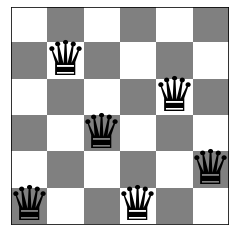

# STEEPEST ASCENT - NEW HIGH SCORE - 
NEW ->  1  for  [4 1 3 5 2 4]
OLD ->  2  for  [5 1 3 5 2 4]
Board with 1 conflicts.


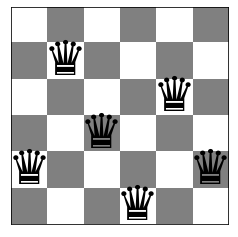

No better solution found after 1000 steps.
Board with 1 conflicts.


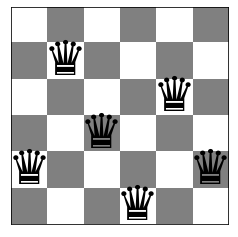

In [106]:
def first_choice_get_neighbor(board,size):
    # copy board for altering
    new_neighbor = board.copy()
    # obtain random queen to move
    col = random.randint(0, size-1)
    # obtain random position to move to
    pos = random.randint(0, size-1)
    # ensure it is not same location, if it is keep generating new locations
    while(new_neighbor[col] == pos):
        pos = random.randint(0, size-1)
    # assign queen to new location
    new_neighbor[col] = pos
    # obtain score
    new_score = conflicts(new_neighbor)
    # return new neighbor
    return((new_score,new_neighbor))

def first_choice_hill(board = None, size = 4, debug = False, max_steps=10000, stop_after=1000):
    # if board not specified, generate one
    if(board == None):   
        current = random_board(size)
    else: 
        current = board
        size = len(current)
    # obtain score of current board
    current_score = conflicts(current)
    # debug
    if(debug):
        print("Starting board...")
        show_board(current)
    # value to keep track of number of steps that have occured since the last best found solution
    steps_since_best = 0
    # run algo until solution is found or max_steps/stop_after is reached
    for step in range(max_steps):
        # return current if no better solution is found after stop_after steps
        if(steps_since_best >= stop_after): 
            if(debug): print("No better solution found after {} steps.".format(stop_after))
            return((current_score,current))
        if(current_score == 0):
            return((current_score,current))
        # obtain neighbors with better score than current
        neighbor = first_choice_get_neighbor(current, size)
        # if at least one better neighbor found
        if(neighbor[0] < current_score):
            # debug
            if(debug):
                print("# STEEPEST ASCENT - NEW HIGH SCORE - ")
                print("NEW -> ",neighbor[0], " for ", neighbor[1])
                print("OLD -> ",current_score, " for ", current)
                show_board(neighbor[1])
            # assign new values
            current_score = neighbor[0]
            current = neighbor[1]
            # reset our steps since best found solution
            steps_since_best = 0
        # if no better neighbor found, increment our steps since best solution found
        steps_since_best = steps_since_best + 1
    if(debug): print("Ending board...")
    return((current_score,current))
    
result = first_choice_hill(size = 6, debug = True)
show_board(result[1])

## Simulated Annealing [2 Points]

You have to experiment with the annealing schedule.

Starting board...
Board with 5 conflicts.


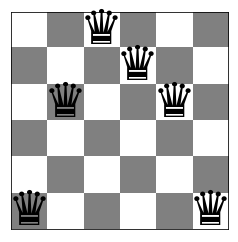

step: 0 	 temp: 2.000 	 deltaE: +1.000 	 new conflict score: 6.000
step: 1 	 temp: 1.998 	 deltaE: -2.000 	 new conflict score: 4.000
step: 3 	 temp: 1.994 	 deltaE: -1.000 	 new conflict score: 3.000
step: 6 	 temp: 1.988 	 deltaE: +0.000 	 new conflict score: 3.000
step: 10 	 temp: 1.980 	 deltaE: +0.000 	 new conflict score: 3.000
step: 15 	 temp: 1.970 	 deltaE: +2.000 	 new conflict score: 5.000
step: 16 	 temp: 1.968 	 deltaE: -1.000 	 new conflict score: 4.000
step: 18 	 temp: 1.964 	 deltaE: +0.000 	 new conflict score: 4.000
step: 21 	 temp: 1.958 	 deltaE: +2.000 	 new conflict score: 6.000
step: 22 	 temp: 1.956 	 deltaE: +0.000 	 new conflict score: 6.000
step: 23 	 temp: 1.955 	 deltaE: -1.000 	 new conflict score: 5.000
step: 24 	 temp: 1.953 	 deltaE: +1.000 	 new conflict score: 6.000
step: 25 	 temp: 1.951 	 deltaE: -1.000 	 new conflict score: 5.000
step: 26 	 temp: 1.949 	 deltaE: +0.000 	 new conflict score: 5.000
step: 27 	 temp: 1.947 	 deltaE: +0.000 	 new confli

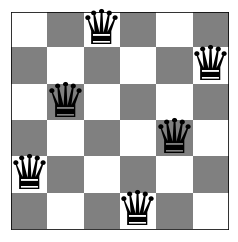

In [234]:
def simulated_annealing_get_neighbor(board,size):
    # copy board for altering
    new_neighbor = board.copy()
    # obtain random queen to move
    col = random.randint(0, size-1)
    # obtain random position to move to
    pos = random.randint(0, size-1)
    # ensure it is not same location, if it is keep generating new locations
    while(new_neighbor[col] == pos):
        pos = random.randint(0, size-1)
    # assign queen to new location
    new_neighbor[col] = pos
    # obtain score
    new_score = conflicts(new_neighbor)
    # return new neighbor
    return((new_score,new_neighbor))

def simulated_annealing(board = None, size = 4, T0 = None, alpha = 0.999, epsilon = 1e-3, debug = False):
# if board not specified, generate one
    if(board == None):   
        current = random_board(size)
    else: 
        current = board
        size = len(current)
    # obtain score of current board
    current_score = conflicts(current)
    # debug
    if(debug):
        print("Starting board...")
        show_board(current)
    # use the current board conflict score to set T0 
    if T0 is None:
        T0 = (size^2) / 2
    # set T and t
    T = T0
    t = 0
    while T > epsilon:
        # calculate temperature from schedule
        T = T0 * alpha ** t
        # obtain neighbor
        neighbor = simulated_annealing_get_neighbor(current, size)
        # calculated delta E
        deltaE = neighbor[0] - current_score
        # check if the new solution is better   
        if deltaE < 0 or np.random.rand() < math.exp(-deltaE/T): 
            current = neighbor[1]
            current_score = neighbor[0]
            if debug: 
                print(f"step: {t} \t temp: {T:5.3f} \t deltaE: {deltaE:+3.3f} \t new conflict score: {current_score:3.3f}")
            if(current_score == 0):
                if(debug): print("Ending board...")
                return((current_score, current))
        t += 1
    if(debug): print("Ending board...")
    return((current_score, current))

result = simulated_annealing(size=6, debug=True)
show_board(result[1])

## Compare Performance [2 Points]

Use runtime, scalability, and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [236]:
# board size we wish to test
board_size = [4,5,7,10,12]
# our algos
algos = {
    steepest_ascent_hill: "Steepest Ascent",
    steepest_ascent_hill_random: "Steepest Ascent Random Restarts",
    stochastic_hill: "Stochastic",
    first_choice_hill: "First Choice",
    simulated_annealing: "Simulated Annealing"
}
# dataframe to store all data
all_data = pd.DataFrame()
# loop through algos and try board sizes
for size in board_size:
    df1 = pd.DataFrame({'Board Size': [], 'Algorithm': [],'Conflicts': [],'Time': []})
    for algo in algos.items():
        time_list = []
        conflict_list = []
        # run for ten iterations
        for i in range(10):
            t0 = time.time()
            result = algo[0](size=size)
            t1 = time.time()
            time_list.append((t1-t0) * 1e3)
            conflict_list.append(result[0])
        # add to dataframe taking average
        df1 = df1.append({
            'Board Size': size,
            'Algorithm': algo[1],
            'Conflicts': (sum(conflict_list) / len(conflict_list)),
            'Time': (sum(time_list) / len(time_list))
        }, ignore_index=True)
    print("Results for board size of {}.".format(size))
    display(df1)
    all_data = all_data.append(df1)


Results for board size of 4.


,Board Size,Algorithm,Conflicts,Time
0,4.0,Steepest Ascent,0.6,3.851748
1,4.0,Steepest Ascent Random Restarts,0.0,3.669477
2,4.0,Stochastic,0.7,1.009274
3,4.0,First Choice,0.7,18.614650
4,4.0,Simulated Annealing,0.0,3.639936


Results for board size of 5.


,Board Size,Algorithm,Conflicts,Time
0,5.0,Steepest Ascent,0.4,2.863312
1,5.0,Steepest Ascent Random Restarts,0.0,3.422761
2,5.0,Stochastic,0.2,3.106308
3,5.0,First Choice,0.1,4.442501
4,5.0,Simulated Annealing,0.0,8.248329


Results for board size of 7.


,Board Size,Algorithm,Conflicts,Time
0,7.0,Steepest Ascent,1.0,15.247607
1,7.0,Steepest Ascent Random Restarts,0.0,25.354338
2,7.0,Stochastic,1.1,11.707926
3,7.0,First Choice,1.3,52.934623
4,7.0,Simulated Annealing,0.0,55.596018


Results for board size of 10.


,Board Size,Algorithm,Conflicts,Time
0,10.0,Steepest Ascent,1.6,46.338272
1,10.0,Steepest Ascent Random Restarts,0.0,328.262877
2,10.0,Stochastic,2.0,54.265022
3,10.0,First Choice,1.5,89.026880
4,10.0,Simulated Annealing,0.2,448.360467


Results for board size of 12.


,Board Size,Algorithm,Conflicts,Time
0,12.0,Steepest Ascent,1.9,89.126468
1,12.0,Steepest Ascent Random Restarts,0.0,2211.214828
2,12.0,Stochastic,2.0,129.262757
3,12.0,First Choice,1.8,141.669369
4,12.0,Simulated Annealing,0.0,553.148723


Taking a look at the above results of the algorithms, we can see that some perform much better on larger boards while others perform better on smaller boards. 

For steepest ascent, we notice that the algorithm is relativively quick with smaller size boards however, it does not once end with 0 conflicts meaning it would get in a local optima quite often which is not ideal. 

Moving on to steepest ascent with random restarts, we see that it actually always finds a solution however, the time it takes to find the solution often is quite large. This would make it un-ideal for larger sized boards. It is almost guaranteed to find the solution with enough restarts.

For stochastic hill climbing we see that it also does not find the optimal solution every time which implies that it also got stuck in a local optima. While its runtime was not that bad, it also tended to bump into the most conflicts out of all the algorithms.

Taking a look at first choice, again we see that it typically would fall into local optima quite a bit with a high conflict score and it also wasnt the best in terms of runtime either. It was somewhat comparable to stochastic with less conflicts but a worse runtime. 

Lastly, looking at simulated annealing we see that it often would be able to find the optimal solution and also took not as long as some of the others but wasnt the best on smaller boards. When dealing with larger boards though, simulate annealing did a great job runtime and anything bigger than 10 it would probably be ideal to use it rather than the others.

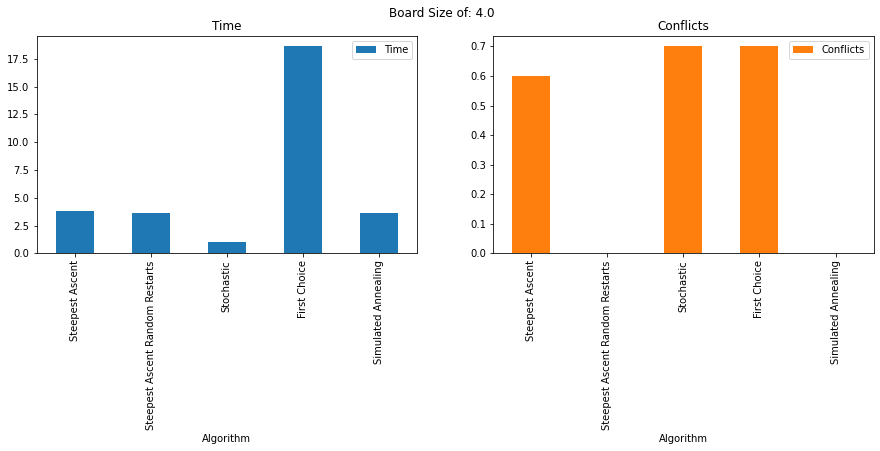

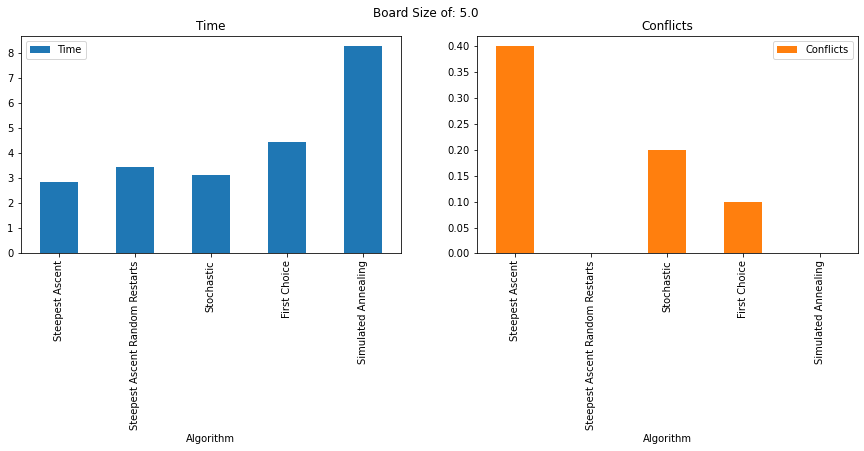

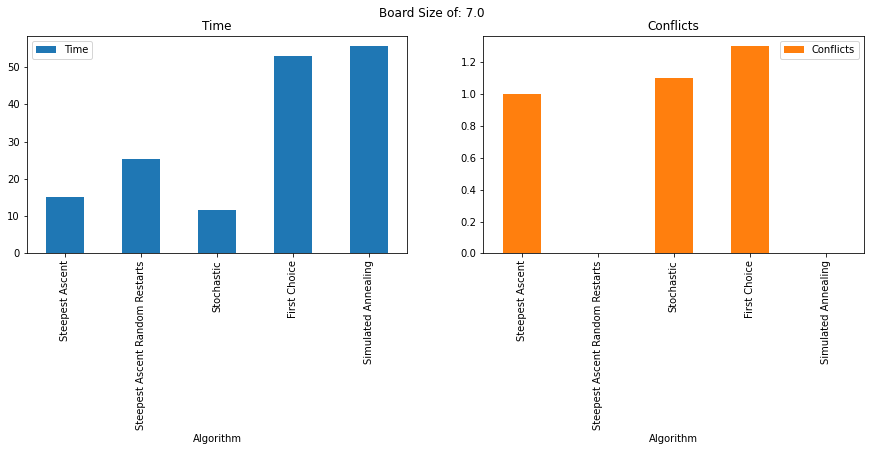

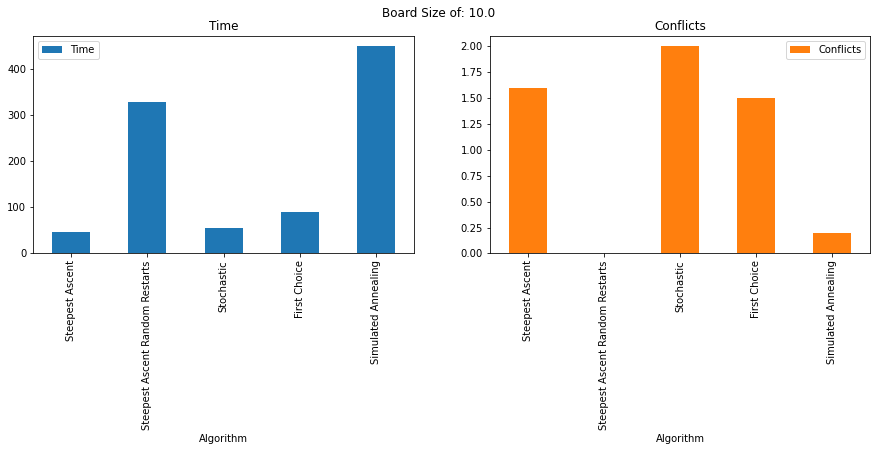

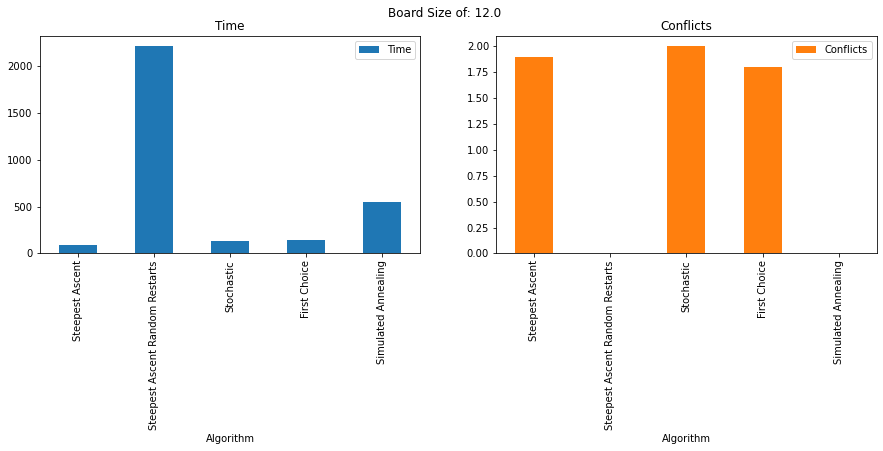

In [237]:
# graphs of each board size comparing algorithm time and conflicts
group_by_size = all_data.groupby('Board Size')
for i, (name, graph) in enumerate(group_by_size):
    graph.plot.bar(x="Algorithm", y=['Time','Conflicts'], subplots = True, layout=(1,2), 
                   figsize=(15,4), title="Board Size of: {}".format(name))

Above you can see some comparisons of the run time and conflict score of the algorithms for each board size.

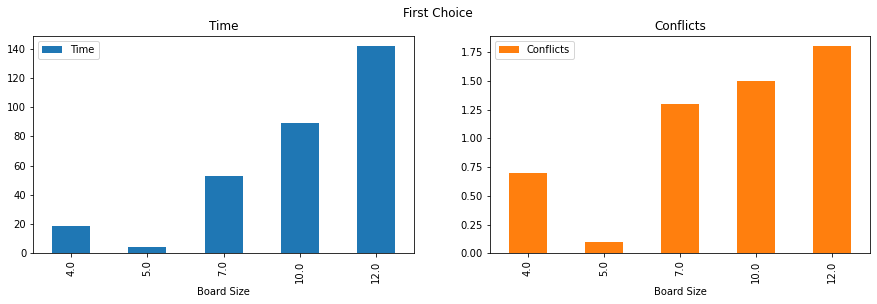

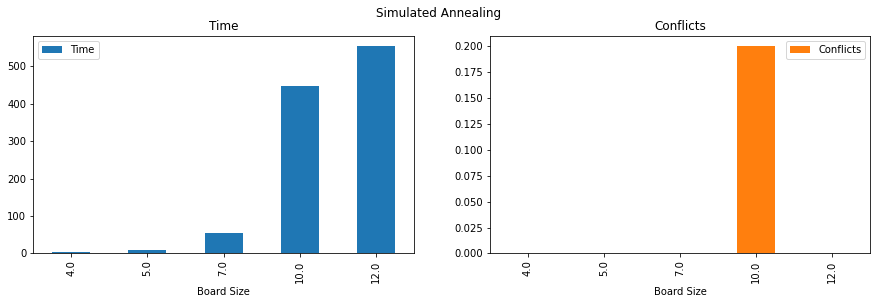

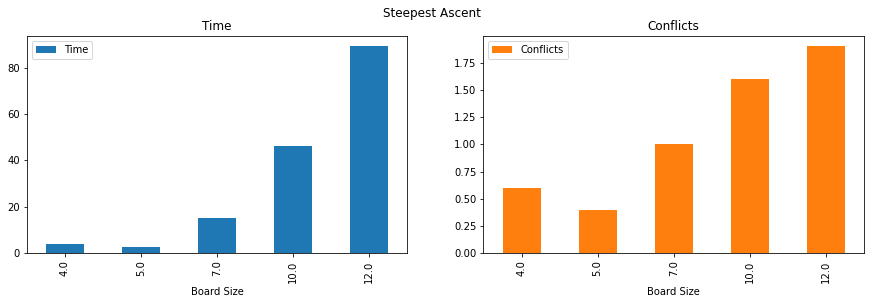

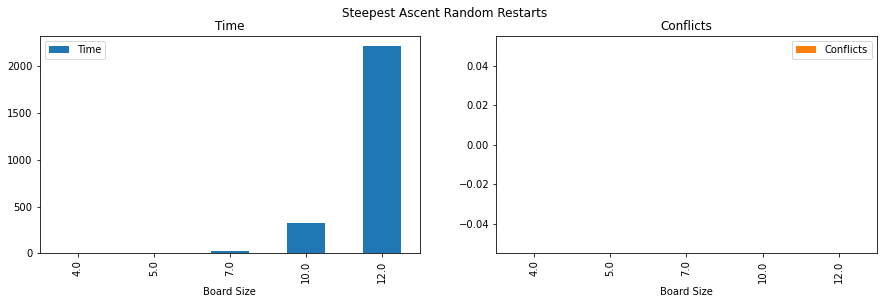

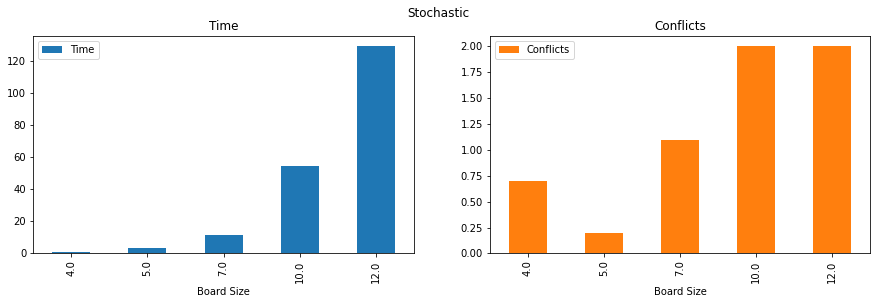

In [238]:
# graphs of each algorithm comparing time and conflicts
group_by_algo = all_data.groupby('Algorithm')
for i, (name, graph) in enumerate(group_by_algo):
    graph.plot.bar(x="Board Size", y=['Time','Conflicts'], subplots = True, layout=(1,2), 
                   figsize=(15,4), title=name)

Above you can see some more comparison of the algorithms only this time comparing the time and conflicts for every board size of a given algorithm. We can see that simulated annealing had the most gradual shift as the board got larger while with others they seemed to not perform as well as the board grew, whether that be time of conflict score.

,Conflicts,Time
Algorithm,,
First Choice,1.08,61.337605
Simulated Annealing,0.04,213.798695
Steepest Ascent,1.10,31.485481
Steepest Ascent Random Restarts,0.00,514.384856
Stochastic,1.20,39.870257


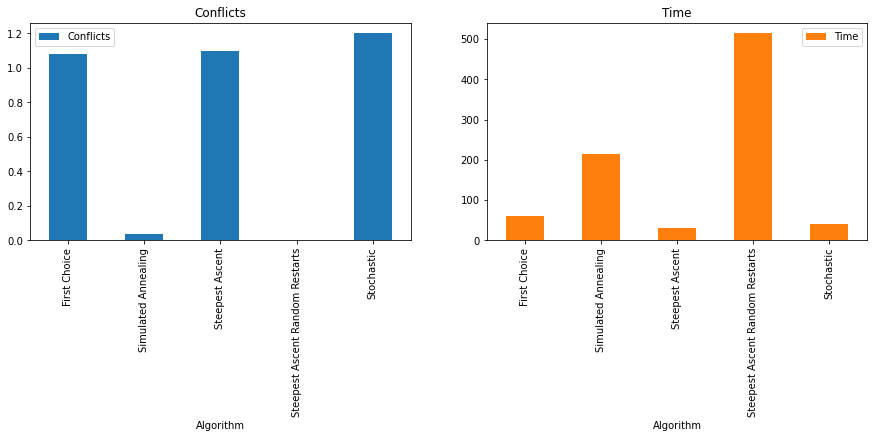

In [239]:
# average time & conflicts
avg = all_data.drop(["Board Size"], axis=1).groupby('Algorithm').mean()
display(avg)
avg_plt = avg.plot.bar(subplots = True, layout=(1,2),figsize=(15,4))

The above graph shoes the average conflicts and run times of each algorithm accross all the board sizes of 4, 5, 7, 10, and 12. When we observe the above we see that simulated annealing has the best balanced results of all the algorithms, with a low average conflict score and a slightly above average run time. You can also see although steepest ascent with random restarts always finds the optimal solution, it performs terribly in regards to runtime and especially on large boards as noted above. So don't be decieved by what you see in regards to conflict scores. As for the others, they are very comparable when it comes to average run time and conflict scores with near identical results.

Given the above analysis, if I were to use one of the algorithms to perform NP Hard search, I would most likely choose simulated annealing due to the fact that the others perform poorly or take a massive amount time to complete. 

## Bonus: Genetic Algorithm [+1 Point]

In [256]:
def genetic_search(size, population_size=15, generations=1000, select_prob=.5,
                   mutation_prob = .2, debug=False):
    # first generate init population
    population = []
    for i in range(population_size):
        board = random_board(size)
        board_score = conflicts(board)
        population.append((board_score, board.copy()))
    
    best_solution = min(population, key = itemgetter(0))[1]
    best_score = min(population, key = itemgetter(0))[0]
    
    # sort population according to best values
    population.sort(key=lambda x:x[0])
    
    for generation in range(generations):
        # selection based on populcation
        selection_pop = selection(population, population_size, select_prob)
        # crossover
        crossover_pop = crossover(size, selection_pop)
        # add crossover population to selection population
        selection_pop.extend(crossover_pop)
        # mutation
        population = mutation(size, selection_pop, mutation_prob)
        # sort by score
        population.sort(key=lambda x:x[0])
        # update best solution
        if(population[0][0] < best_score):
            best_score = population[0][0]
            best_solution = population[0][1].copy()
            if debug: 
                print("FOUND BETTER SOLUTION SCORE {} - {}".format(best_score,best_solution))
            # if found global min, return as optimal solution
            if(best_score == 0):
                return((best_score, best_solution))

    return((best_score, best_solution))
        
def selection(population, population_size, prob):
    # how many of best in population choosing to take
    selected_num = population_size * prob
    # return top selected_num of solutions
    return(population[0:int(selected_num)].copy())

def crossover(size, selection_pop):
    selected = selection_pop.copy()
    crossover_pop = []
    # loop through half of solutions and peform crossover 
    for i in range(int(len(selection_pop)/2)):
        # obtain two solutions to crossover and ensure we utilize as many of the unique
        #  solutions as possible by removing them after crossing them
        p1 = selected.pop(random.randint(0, len(selected)-1))
        p2 = selected.pop(random.randint(0, len(selected)-1))    
        # find crossover index that is not at the ends
        cross_index = random.randint(1, size-2)
        # obtain the crossover result
        c1 = np.concatenate(( p1[1][0:cross_index], p2[1][cross_index:size] ))
        c2 = np.concatenate(( p2[1][0:cross_index], p1[1][cross_index:size] ))
        # add the solutions to our crossover values
        crossover_pop.append((conflicts(c1), c1.copy()))
        crossover_pop.append((conflicts(c2), c2.copy()))
        
    return(crossover_pop)

def mutation(size, selection_pop, mutation_prob):
    # obtain number of mutations
    mutations = int(len(selection_pop) * mutation_prob)
    for i in range(mutations):
        # obtain element to mutate at random
        to_mutate_idx = random.randint(0, len(selection_pop)-1)
        to_mutate = selection_pop[to_mutate_idx][1]
        # obtain new random location for mutation
        col = random.randint(0, size-1)
        row = random.randint(0, size-1)
        # apply mutation
        to_mutate[col] = row
        # add back into population
        selection_pop[to_mutate_idx] = (conflicts(to_mutate), to_mutate.copy())
        
    return selection_pop.copy()

FOUND BETTER SOLUTION SCORE 9 - [11  7  9  4  8  3 10  1  6  1  9  6]
FOUND BETTER SOLUTION SCORE 8 - [ 2  7 11  1  8  4 10  1 10 10  0 11]
FOUND BETTER SOLUTION SCORE 7 - [ 5  1  9  8  8  4 10  1  6 10  0 11]
FOUND BETTER SOLUTION SCORE 5 - [ 2  7  9  4  8  4 10  1  6 10  0 11]
FOUND BETTER SOLUTION SCORE 4 - [ 5  3  9  4  8  4 10  1  6  1  0 11]
FOUND BETTER SOLUTION SCORE 3 - [ 5  7  9  3  8  4  9  1  6 10  0 11]
FOUND BETTER SOLUTION SCORE 2 - [ 5  7  9  3  8  4  9  1  6 10  0  2]
FOUND BETTER SOLUTION SCORE 1 - [ 5  7  9  3  8  4  1 11  6 10  0  2]
FOUND BETTER SOLUTION SCORE 0 - [ 5  7  9  3  8  4  1 10  6 11  0  2]
Board with 0 conflicts.


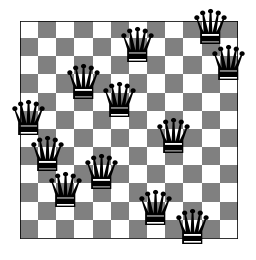

In [260]:
result = genetic_search(size=12, debug=True)
show_board(result[1])

In [284]:
# board size we wish to test
board_size = [4,5,7,10,12]
# dataframe to store all data
genetic_data = pd.DataFrame({'Board Size': [],'Conflicts': [],'Time': []})
# loop through algos and try board sizes
for size in board_size:
    print("Running Board Size {}".format(size))
    time_list = []
    conflict_list = []
    # run for ten iterations
    for i in range(10):
        t0 = time.time()
        result = genetic_search(size=size)
        t1 = time.time()
        time_list.append((t1-t0) * 1e3)
        conflict_list.append(result[0])
    # add to dataframe taking average
    genetic_data = genetic_data.append({
        'Board Size': size,
        'Conflicts': (sum(conflict_list) / len(conflict_list)),
        'Time': (sum(time_list) / len(time_list))
    }, ignore_index=True)

display(genetic_data)

Running Board Size 4
Running Board Size 5
Running Board Size 7
Running Board Size 10
Running Board Size 12


,Board Size,Conflicts,Time
0,4.0,0.0,9.393954
1,5.0,0.0,81.497431
2,7.0,0.6,341.537642
3,10.0,0.7,671.277905
4,12.0,0.6,726.582718


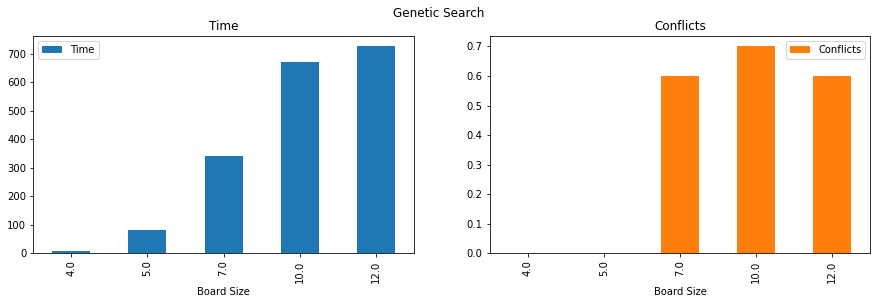

In [286]:
genetic_graph = genetic_data.plot.bar(x="Board Size", y=['Time','Conflicts'], subplots = True, 
                                      layout=(1,2), figsize=(15,4), title="Genetic Search")

In [285]:
print("AVERAGE CONFLICT SCORE AND TIME: ")
genetic_avg = genetic_data.drop(["Board Size"], axis=1).mean()
display(genetic_avg)

AVERAGE CONFLICT SCORE AND TIME: 


Conflicts      0.38000
Time         366.05793
dtype: float64

In [287]:
new_avg = avg
new_avg.loc['Genetic'] = [genetic_avg['Conflicts'], genetic_avg['Time']]
display(new_avg)

,Conflicts,Time
Algorithm,,
First Choice,1.08,61.337605
Simulated Annealing,0.04,213.798695
Steepest Ascent,1.10,31.485481
Steepest Ascent Random Restarts,0.00,514.384856
Stochastic,1.20,39.870257
Genetic,0.38,366.057930


In the genetic algorithm we see right off the bat that it is somewhat comparable to simulated annealing. We would expect that genetic may out perform simulated annealing but again it may perform much better on much larger boards. Above we can see the averages of the algorithm and it seems to take longer than simulated annealing while also ending in a state not that is not as good. This could be due to my implementation and fine tuning the parameters of genetic may help obtain a better solution. Regardless, it still outperformed most of the other algorithms in time and conflict score. I used a selection probability of 50% and a mutation rate of 20%. 

Ultimately, it seems that my simulated annealing algorithm peformed the best by far and would be the best algorithm to choose when trying to find optimal solutions for this problem efficiently. If you have all the time in the world and dont car about long run times, then steepest ascent with random restarts is pretty good but it is unlikely you would ever find yourself in the position. Thus in the end, I would reccomend utilizing simulated annealing.

On a side note, in a class in the past I implemented a simulated annealing algorithm to solve TSP and it also was the best performing algorithm. It is interesting because it is truly one of the easier algorithms to implement and it performs so well!